In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import astropy.units as u
import astropy.constants as c

In [15]:
def gravity(m1, m2, radius):
    return (c.G * m1 * m2 / radius**2).decompose()

def acceleration(m1, radius):
    return (c.G * m1 / radius**2).decompose()

In [16]:
m1 = 10 * u.solMass
m2 = 100 * u.solMass

radius = 0.1 * u.AU

In [18]:
acceleration(m1, radius)#.to(u.Newton)

<Quantity 5.931732858048708 m / s2>

In [19]:
# Place a black hole at the origin
black_hole = [0,0]

In [20]:
import scipy

from scipy.integrate import odeint

In [479]:
# Make the state vector
start_distance = 0.05*u.AU
impact_factor = .01*u.AU
start_velocity = 7e7*u.meter/u.second
x = [-start_distance.to(u.meter).value, impact_factor.to(u.meter).value, \
     start_velocity.to(u.meter/u.second).value, 0]

In [506]:
def func_ODE(X, t):
    M = 10e4 * u.solMass
    Gm = c.G * M.to(u.kilogram)
    #Gm = Gm.value()
    f = np.zeros(4)  #  x, y, z, vx, vy, vz
    f[:2] = X[2:]    #  dx/dt = v
    one_over_r_cubed = ((X[:3]**2).sum())**-1.5
    f[2:] = - Gm * X[:2] * one_over_r_cubed

    return f

In [507]:
times = np.linspace(0,3e2, 3e2)*u.second

In [508]:
X, output_dict = odeint(func_ODE, x, times, full_output=True)

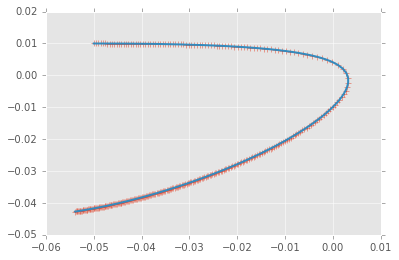

In [509]:
plt.style.use('ggplot')
plt.plot((X[:,0]*u.meter).to(u.AU)[::1], (X[:,1]*u.meter).to(u.AU)[::1], '+' )
plt.plot((X[:,0]*u.meter).to(u.AU), (X[:,1]*u.meter).to(u.AU), lw=2)

In [395]:
len(X[:,0])

1000